In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

pd.options.display.float_format = "{:.2f}".format
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

# Animal Classification in the Zoo

**Source database:**
- https://www.kaggle.com/datasets/uciml/zoo-animal-classification/data

**Our database contains two datasets:**
- zoo.csv
- class.csv

The zoo.csv dataset includes 101 animals from the zoo. It contains 16 attributes describing various characteristics of the animals. The first attribute, "animal_name," represents the name of the animal, which is not needed for further analysis. The last attribute is the decision attribute indicating the class of a given animal. The class.csv dataset includes 7 animal types: Mammal, Bird, Reptile, Fish, Amphibian, Insect, and Invertebrate.

**Detailed description of attributes:**
- hair - Does the animal have hair? 1 - has, 0 - does not have
- feathers - Does the animal have feathers? 1 - has, 0 - does not have
- eggs - Does the animal lay eggs? 1 - lays, 0 - does not lay
- milk - Does the animal produce milk? 1 - yes, 0 - no
- airborne - Can the animal fly? 1 - yes, 0 - no
- aquatic - Is the animal aquatic? 1 - yes, 0 - no
- predator - Is the animal a predator? 1 - yes, 0 - no
- toothed - Does the animal have teeth? 1 - yes, 0 - no
- backbone - Does the animal have a backbone? 1 - yes, 0 - no
- venomous - Is the animal venomous? 1 - yes, 0 - no
- fins - Does the animal have fins? 1 - yes, 0 - no
- legs - How many legs does the animal have? Possible values are 0 legs, 2 legs, 4 legs, 5 legs, 6 legs, 8 legs
- domestic - Is the animal domesticated? 1 - yes, 0 - no
- catsize - Is the animal cat-sized? 1 - yes, 0 - no

We will start by loading the zoo.csv dataset and displaying a portion of it before and after removing the "animal_name" attribute.

In [2]:
df_org = pd.read_csv("zoo.csv")
print(df_org.iloc[:,:])
df = df_org.drop(columns = df_org.columns[0])
df.head()

    animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1 

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Next, we load the class.csv dataset and display a portion of it.

In [3]:
classes = pd.read_csv("class.csv")
print(classes.iloc[:,:])

   Class_Number  Number_Of_Animal_Species_In_Class    Class_Type  \
0             1                                 41        Mammal   
1             2                                 20          Bird   
2             3                                  5       Reptile   
3             4                                 13          Fish   
4             5                                  4     Amphibian   
5             6                                  8           Bug   
6             7                                 10  Invertebrate   

                                        Animal_Names  
0  aardvark, antelope, bear, boar, buffalo, calf,...  
1  chicken, crow, dove, duck, flamingo, gull, haw...  
2    pitviper, seasnake, slowworm, tortoise, tuatara  
3  bass, carp, catfish, chub, dogfish, haddock, h...  
4                             frog, frog, newt, toad  
5  flea, gnat, honeybee, housefly, ladybird, moth...  
6  clam, crab, crayfish, lobster, octopus, scorpi...  


The "class.csv" dataset contains detailed information about animal classes.

- The "Class_Number" column contains the class numbers.
- The "Number_of_Animal_Species_In_Class" column indicates the number of animals in each class.
- The "Class_Type" column assigns a name to each class.
- The "Animal_Names" column lists the names of all animals belonging to a given class.

This dataset may be useful in analyzing the "zoo.csv" dataset. The information about class names and the number of animals in each class will be particularly helpful.

We display basic information about the dataset, such as:
- Number of objects
- Number of classes
- Number of objects in each class
- Number of attributes
- Number of missing values

The **describe** method displays descriptive statistics, including those that summarize the central tendency, dispersion, and shape of the dataset distribution, excluding NaN values.

The **info** method shows information about the attribute types. They are of type int, but their values are only 0 or 1, except for the legs attribute.

A bar chart shows the number of objects in each class.

Objects = 101
Classes = 7
Objects in class  1 = 41
Objects in class  4 = 13
Objects in class  2 = 20
Objects in class  7 = 10
Objects in class  6 = 8
Objects in class  5 = 4
Objects in class  3 = 5
Atributes = 18
Missing values = 0
        hair  feathers   eggs   milk  airborne  aquatic  predator  toothed  \
count 101.00    101.00 101.00 101.00    101.00   101.00    101.00   101.00   
mean    0.43      0.20   0.58   0.41      0.24     0.36      0.55     0.60   
std     0.50      0.40   0.50   0.49      0.43     0.48      0.50     0.49   
min     0.00      0.00   0.00   0.00      0.00     0.00      0.00     0.00   
25%     0.00      0.00   0.00   0.00      0.00     0.00      0.00     0.00   
50%     0.00      0.00   1.00   0.00      0.00     0.00      1.00     1.00   
75%     1.00      0.00   1.00   1.00      0.00     1.00      1.00     1.00   
max     1.00      1.00   1.00   1.00      1.00     1.00      1.00     1.00   

       backbone  breathes  venomous   fins   legs   tail  domesti

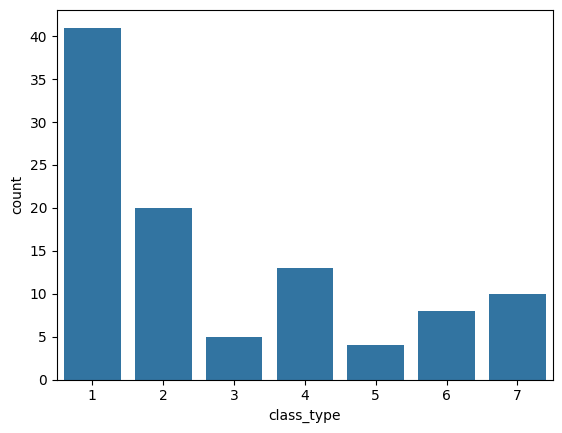

In [4]:
print("Objects =", df_org.shape[0])

class1=df_org.columns[-1]

cl=df_org.iloc[:,-1]
print('Classes =',cl.unique().shape[0])

for i in list(cl.unique()):
    print('Objects in class ',i,'=',len(df_org[df_org[class1]==i]))

print("Atributes =", df_org.shape[1])

print("Missing values =",df_org.isnull().sum().sum())

data_delete=df_org.iloc[:,:].dropna()
print(df_org.describe())

sns.countplot(df_org,x=class1)

df_org.info()

Based on the chart, we can see that the largest number of animals belong to class 1, which, according to the class.csv dataset, corresponds to the group of mammals. The next largest class is class 2, which represents birds. Following that is class 4, which corresponds to fish. The remaining classes, in descending order, are class 7 (invertebrate), class 6 (bug), class 3 (reptile), and class 5 (amphibian). The number of objects in each class matches the data in the class table.

We can also observe that all attributes except animal_name are of type int64. However, in reality, each of these attributes only takes values of 0 or 1, so we can treat them as binary attributes. The exception is the legs attribute, which can have different values depending on the number of legs the animal has.

**Since the legs attribute is the only data type that does not take only values of 0 or 1, we convert it into six (one for each legs value) boolean attributes for a more consistent analysis.We use the pd.get_dummies method for this, which ensures that each variable is converted into as many 0-or-1 variables as there are unique values.**

In [5]:
df_legs = pd.get_dummies(df["legs"], prefix="legs", drop_first=False)
colsLegs = ["legs" + str(leg) for leg in sorted(df["legs"].unique())]
df_legs.columns = colsLegs
df_legs.head()

,legs0,legs2,legs4,legs5,legs6,legs8
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,True,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


## Exploratory Analysis

**Next, we displayed a count matrix for pairs of attributes in our table. In other words, it shows how many data points have both attributes present.**

Count matrix for pairs of binary attributes:


<Axes: >

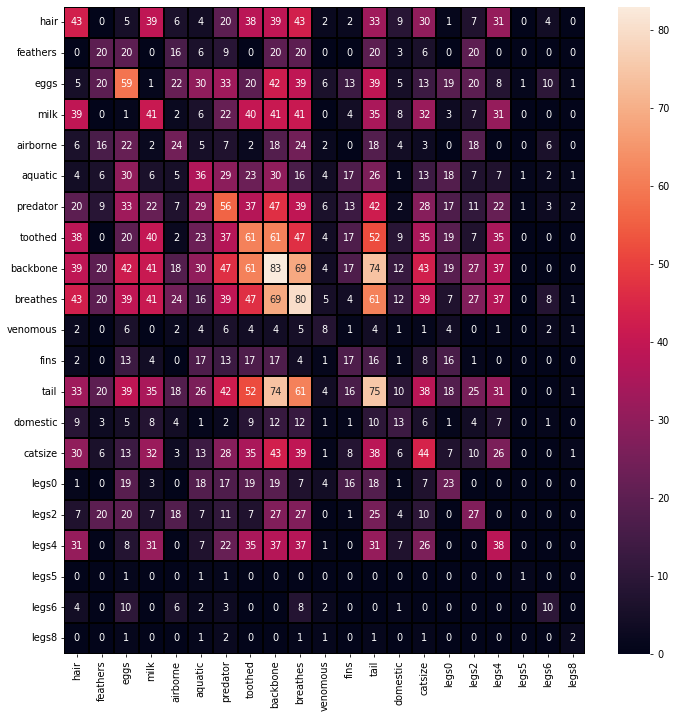

In [6]:
classes2 = df["class_type"].copy()
df=df.drop(columns={"legs","class_type"})
df=df.join(df_legs)
df["class_type"] = classes2
df_no_class = df.drop(columns = "class_type")

count_matrix = pd.DataFrame(index=df_no_class.columns, columns=df_no_class.columns, data=0)

for col1 in df_no_class.columns:
    for col2 in df_no_class.columns:
        count_matrix.loc[col1, col2] = (df_no_class[col1] & df_no_class[col2]).sum()

print("Count matrix for pairs of binary attributes:")
plt.figure(figsize = (12, 12), dpi = 70)
sns.heatmap(count_matrix,annot = count_matrix,linewidths=0.5, linecolor='black')

Analyzing the count matrix, we can observe that:
- Compared to other attributes, there are very few venomous animals.
- The majority of animals have four or two legs. There is also a large number of legless animals. The least common are animals with 5, 6, or 8 legs.
- The most frequent attribute pairs are spine and breathing, spine and tail, breathing and tail, and spine and teeth.
- Looking at the cells on the diagonal, we can see which features are the most common. It is clear that these are spine, breathing, and tail.

**Next, we displayed a count matrix that shows how many individuals from each class have a specific attribute.**

The number of objects for each class and each attribute:


<Axes: ylabel='Class_Type'>

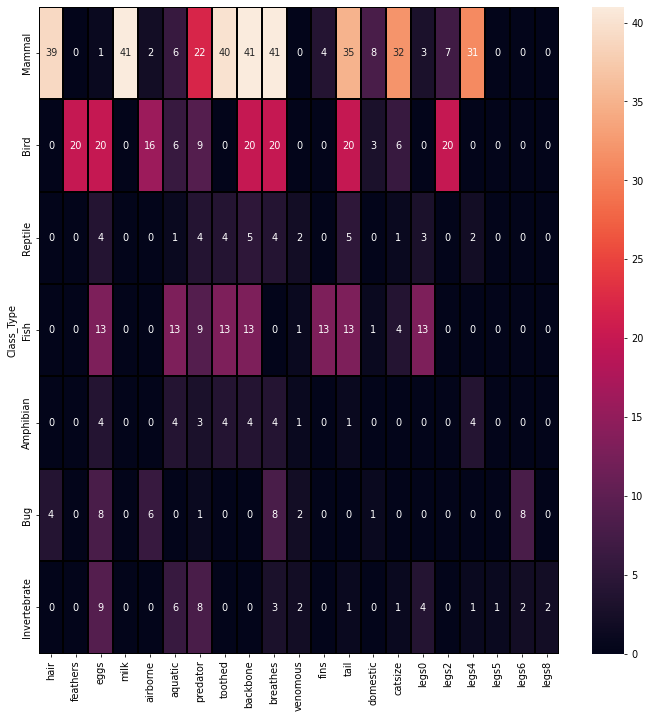

In [7]:
class_attribute_counts = df.groupby('class_type').sum()
class_attribute_counts.set_index(classes['Class_Type'], inplace=True)
print("The number of objects for each class and each attribute:")
plt.figure(figsize = (12, 12), dpi = 70)
sns.heatmap(class_attribute_counts ,annot = class_attribute_counts,linewidths=0.5, linecolor='black')

**From this matrix, the following conclusions can be drawn:**
- Analyzing the rows, we can observe that the largest group in the dataset are mammals. Next are birds and fish. Other classes seem to be significantly less numerous. This observation aligns with the information in the classes table and is consistent with the bar chart presented during the zoo table analysis.
- The most common features in mammals are hair, milk, teeth, spine, and breathing. Predator, tail, cat size, and four legs also frequently occur. Milk, spine, and breathing are present in every mammal.
- The features present in every bird are feathers, eggs, spine, breathing, tail, and two legs. Most birds also have the flying feature.
- In reptiles, the most common features are eggs, being a predator, teeth, spine, breathing, and tail.
- All fish have the features of eggs, living in water, teeth, spine, fins, tail, and no legs. Most also have the predator feature.
- The features present in all amphibians are eggs, living in water, teeth, spine, breathing, and four legs. Most amphibians are also predators.
- All bugs have eggs, breathing, and six legs. Hair and flying are also common features.
- Invertebrates predominantly have the features of eggs, living in water, and being predators. Breathing and the absence of legs also frequently occur.
- It can also be observed that the milk feature is found only in mammals, the feathers feature only in birds, and the features of 5 and 8 legs are found only in invertebrates.

**Next, we created a correlation matrix of features.**

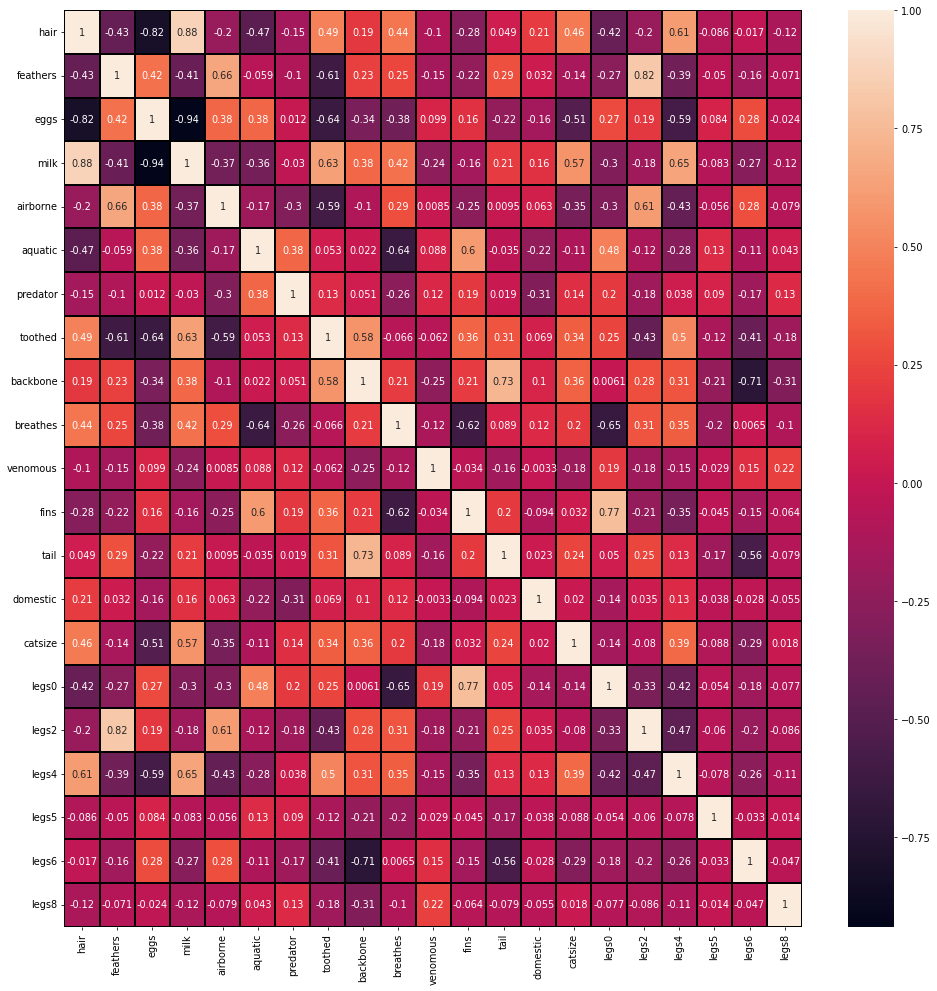

In [8]:
plt.figure(figsize = (17, 17), dpi = 70)
df_corr=df_no_class.corr()
sns.heatmap(df_corr,annot = df_corr,linewidths=0.5, linecolor='black')
plt.show()

**Based on the correlation matrix:**
- The milk feature is strongly negatively correlated with the egg feature and strongly positively correlated with the hair feature.
- It can be observed that the feathers feature is strongly correlated with the two legs (legs2) feature.
- The no legs (legs0) feature shows a strong correlation with the fins feature.
- The egg feature is strongly negatively correlated with the hair feature.

From the previous matrix, it is clear that the milk feature appears in every mammal and does not occur in any other species. This suggests that it is very effective at distinguishing mammals. Considering the correlation matrix as well, we can conclude that the egg feature is potentially redundant for further analysis and should be considered for removal.

Based on the previous conclusions, we are removing the eggs feature.

In [9]:
df = df.drop(columns = "eggs")
print(df.head())

   hair  feathers  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     1         0        0         1        1         1   
1     1         0     1         0        0         0        1         1   
2     0         0     0         0        1         1        1         1   
3     1         0     1         0        0         1        1         1   
4     1         0     1         0        0         1        1         1   

   breathes  venomous  ...  tail  domestic  catsize  legs0  legs2  legs4  \
0         1         0  ...     0         0        1  False  False   True   
1         1         0  ...     1         0        1  False  False   True   
2         0         0  ...     1         0        0   True  False  False   
3         1         0  ...     0         0        1  False  False   True   
4         1         0  ...     1         0        1  False  False   True   

   legs5  legs6  legs8  class_type  
0  False  False  False           1  
1  False  False  F

## Unsupervised Learning

**In the next step, we attempted to perform clustering for our dataset. We used a dataframe without the decision attribute for this purpose. First, we tested agglomerative hierarchical clustering.**

In [10]:
def aglomerativeClustering(df_org, dfc, group_num):
    plt.figure(figsize=(20,10))
    for index, distance_type in enumerate(('average', 'complete', 'single', 'ward')):
        plt.subplot(1,4,index+1)
        model = AgglomerativeClustering(linkage = distance_type, metric = 'euclidean', n_clusters = group_num)
        model.fit(dfc)
        class1 = df_org["class_type"].astype('category').cat.codes
        group1 = model.labels_

        mistakes = pd.crosstab(class1,group1)
        sns.heatmap(mistakes,annot = mistakes,linewidths=0.5, linecolor='black')
        plt.xlabel("group")
        plt.ylabel("class")
        plt.title('Confusion matrix for the distance type '+distance_type)
    plt.show()

We displayed confusion matrices for four types of distance:
- average - calculates the average value based on all distances
- complete - selects the longest distance
- single - selects the shortest distance
- ward - merges clusters that will have the smallest increase in variance

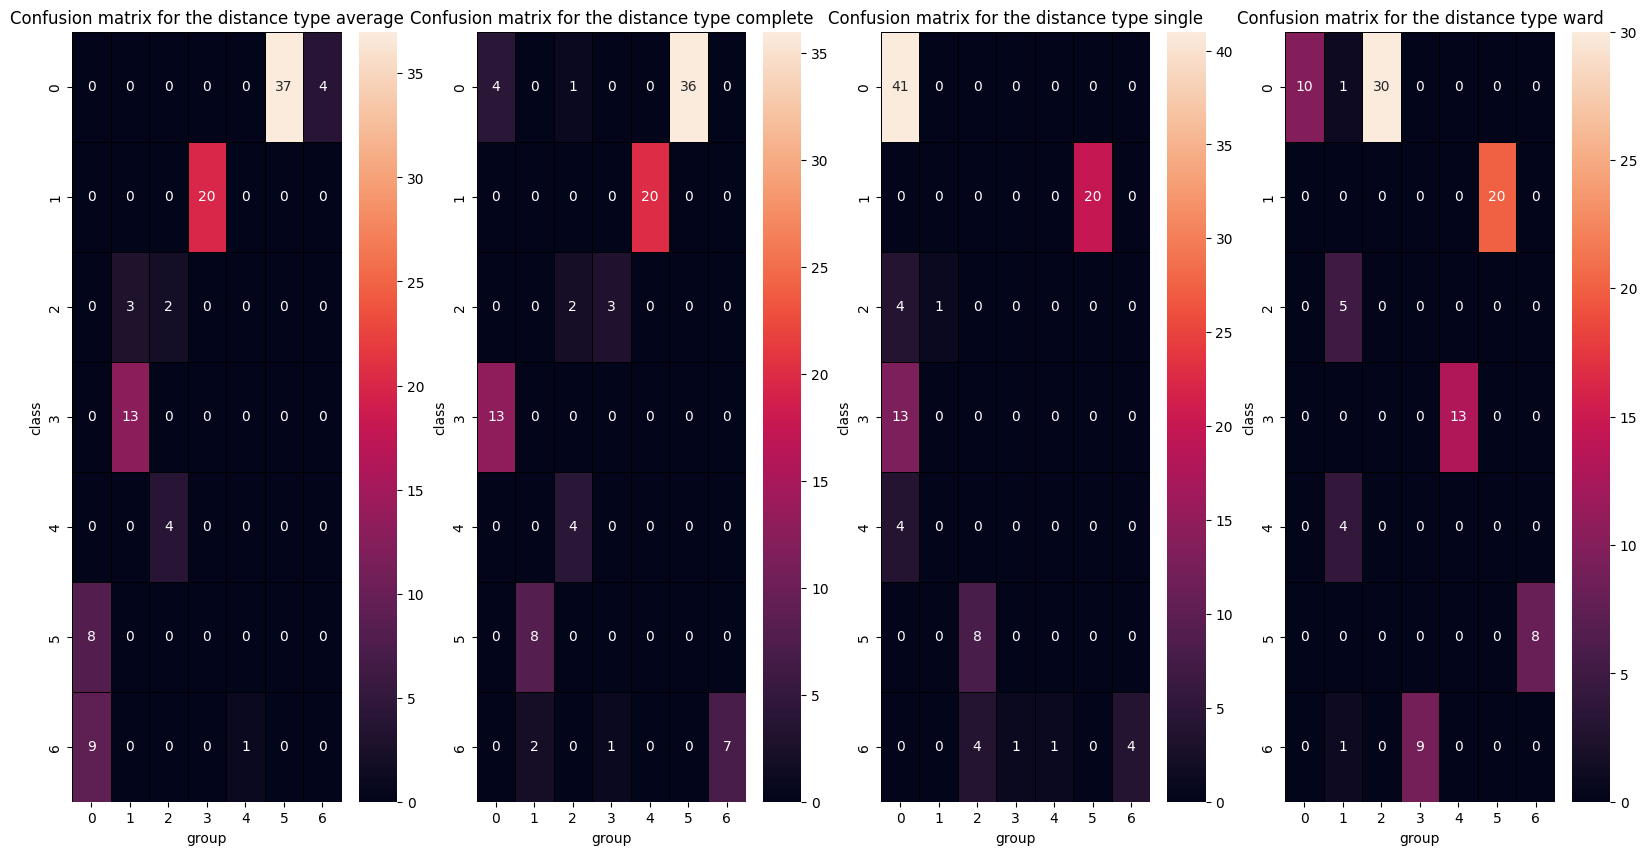

In [11]:
aglomerativeClustering(df,df_no_class,7)

**Average type**
- Almost all objects from classes 5 and 6 were assigned to group 0.
- Class 0 was almost entirely assigned to group 5, with the exception of 4 objects assigned to group 6.
- Class 3 was fully assigned to group 1, but this group also contains objects from class 2.
- Class 1 was correctly assigned entirely to group 3, with no objects from other classes in this group.

**Complete type**
- Similar to the average type, with differences in specific groups.
- Class 0 and class 6 are more scattered among the groups.

**Single type**
- The worst result among all distance types.
- Classes 0, 1, 2, and 4 were almost entirely assigned to one group.
- Groups 1, 3, and 4 are almost empty.

**Ward type**
- Class 0 is divided among groups 0, 1, and 2, but occupies all of group 0.
- Classes 2 and 4 were assigned to group 1.
- It can be concluded that class 0 and group 1 were incorrectly assigned.

Based on all the matrices, it can be stated that the best assignment to groups was for classes 1, 3, 4, and 5, i.e., Birds, Fish, Amphibians, and Bugs, since the entire class was assigned to one group (though the groups are not perfect). None of the distance types is ideal for this dataset, but the ward type can be highlighted as one of the better ones.

In conclusion, hierarchical agglomerative clustering does not yield good results for this dataset.

Next, we performed clustering using the k-means method for k = 7 and presented an elbow plot for different values of k.

In [12]:
def kMeansClustering(df_org, dfc):
    quality_metric = pd.Series()
    section = range(2,10)
    for i in section:
        model = KMeans(n_clusters = i, random_state = 0)
        kmeans = model.fit(dfc)

        quality_metric = quality_metric._append(pd.Series(kmeans.inertia_))
    plt.figure(figsize = (10,10))
    plt.plot(section, quality_metric,'bo-')
    plt.title("Elbow plot", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Number of groups")
    plt.ylabel("Sum of distances from centroids")

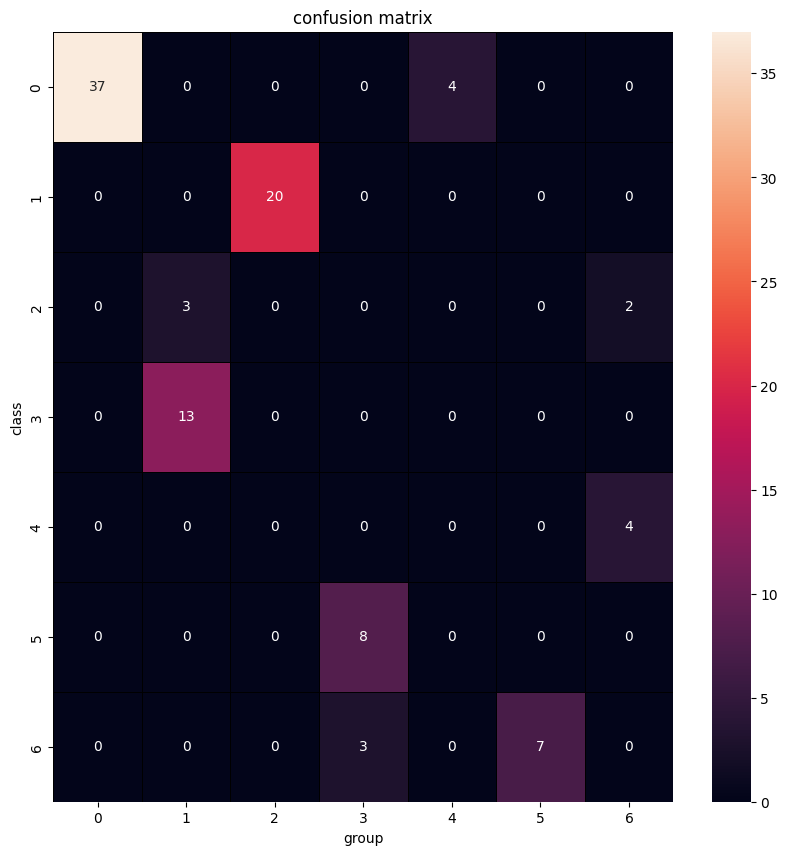

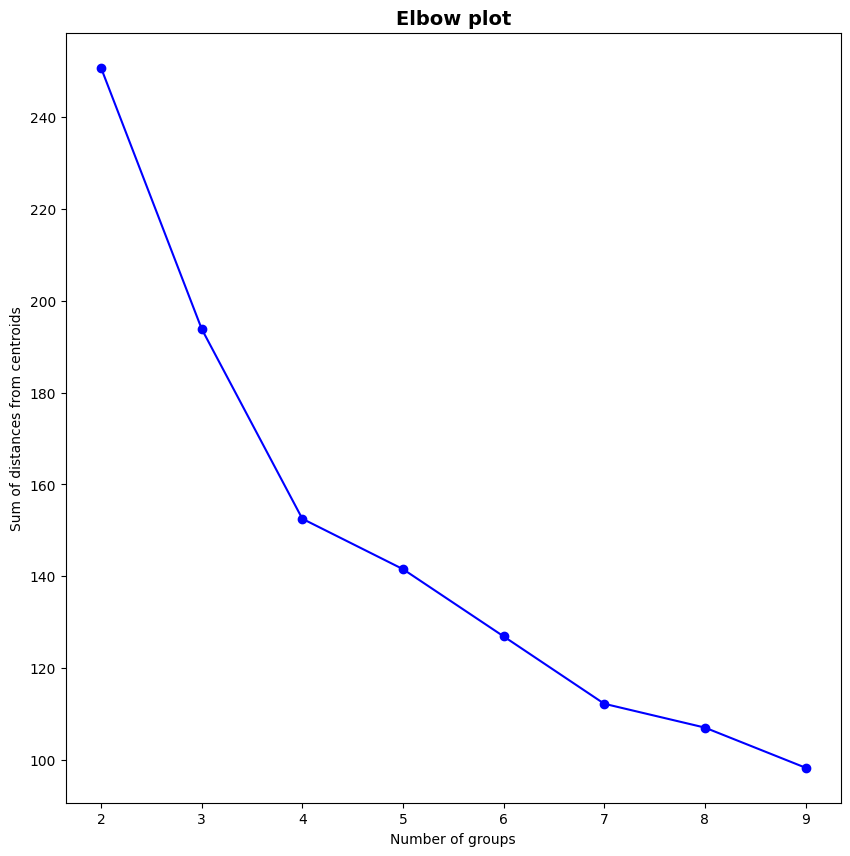

In [13]:
plt.figure(figsize=(10,10))
model = KMeans(n_clusters = 7, random_state = 0)
kmeans = model.fit(df_no_class)

class1 = df["class_type"].astype('category').cat.codes
group1 = model.labels_

mistakes = pd.crosstab(class1,group1)
sns.heatmap(mistakes,annot = mistakes,linewidths=0.5, linecolor='black')
plt.xlabel("group")
plt.ylabel("class")
plt.title('confusion matrix')
plt.show()

kMeansClustering(df,df_no_class)

From the confusion matrix, we can draw the following conclusions:
- Each of classes 1, 3, 4, and 5 was fully assigned to one group.
- However we can see that group corresponding to class 1 (birds) is the only one that has all animals from its class and no animals from other classes.
- It can be concluded that this clustering method is not the best for this number of groups, as there is significant mixing of classes across different groups.

Based on the elbow plot, it can be concluded that the optimal number of groups is 4, as after that, the changes in the sum of distances from centroids are noticeably smaller. However, these are not highly distinguishing results.

## Supervised Learning

The next step is to test different classifiers and find the best one.

We created two datasets that differ in the way we split them into training and test sets. This will allow for a more accurate evaluation of the classifiers.

The methods split and split_without_seed divide our dataset into training and test sets. We pass the data frame and the proportions we want to use. In the split method, we also provide the value for the random_state argument, which ensures that the resulting split is always the same.

In [14]:
def split(df,proportion, seed):
    descr_train, descr_test, dec_train, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proportion, random_state=seed)
    return {"descr_train":descr_train, "descr_test":descr_test, "dec_train":dec_train, "dec_test":dec_test}

def split_without_seed(df,proportion):
    descr_train, descr_test, dec_train, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proportion)
    return {"descr_train":descr_train, "descr_test":descr_test, "dec_train":dec_train, "dec_test":dec_test}

In [15]:
data1 = split(df, 0.3, 535)
data2 = split(df,0.3, 1892)

The testSplits method performs multiple splits into training and test sets and evaluates the model's accuracy on them. It then calculates the mean and standard deviation of these accuracies for both the training and test sets. The number of splits and the model are provided as arguments.

In [16]:
import math
def testSplits(n, model):
    train_res = []
    test_res = []
    for i in range(0,n):
        datan = split_without_seed(df, 0.3)
        model.fit(datan["descr_train"], datan["dec_train"])
        train_res.append(model.score(datan['descr_train'],datan['dec_train']))
        test_res.append(model.score(datan['descr_test'],datan['dec_test']))
    train_sum = 0.0
    test_sum = 0.0
    for i in range(0,n):
        train_sum = train_sum + train_res[i]
        test_sum = test_sum + test_res[i]
    train_mean = train_sum/n
    test_mean = test_sum/n
    train_sum2 = 0.0
    test_sum2 = 0.0
    for i in range(0,n):
        train_sum2 = train_sum2 + pow(train_res[i] - train_mean, 2)
        test_sum2 = test_sum2 + pow(test_res[i] - test_mean, 2)
    train_dev = math.sqrt(train_sum2/n)
    test_dev = math.sqrt(test_sum2/n)
    print("For the training set, the mean accuracy for ", n, " splits is ", train_mean," and the standard deviation is ", train_dev)
    print("For the test set, the mean accuracy for ", n, " splits is ", test_mean," and the standard deviation is ", test_dev)

The verify method calculates and displays the confusion matrix along with the accuracy for the training and test sets for a given classifier.

In [20]:
def verify(model,data):
    model.fit(data["descr_train"], data["dec_train"])
    result_train = model.predict(data["descr_train"])
    result_test = model.predict(data["descr_test"])
    cm = confusion_matrix(data["dec_train"],result_train)
    print("confusion matrix - training set, accuracy:",model.score(data['descr_train'],data['dec_train']))

    plt.figure(figsize = (8, 8), dpi = 70)
    sns.heatmap(cm ,annot = cm,linewidths=0.5, linecolor='black')
    plt.show()
    cm = confusion_matrix(data["dec_test"],result_test)
    print("confusion matrix - test set, accuracy:",model.score(data['descr_test'],data['dec_test']))

    plt.figure(figsize = (8, 8), dpi = 70)
    sns.heatmap(cm ,annot = cm,linewidths=0.5, linecolor='black')
    plt.show()

### k-Nearest Neighbors Classifier

**knnClass**
- Defines the k-Nearest Neighbors classifier model and then runs the **verify** method.

**runKNN**
- Executes the **knnClass** method for k values (1,3,5,7,9) and displays the error plot.


### Note!
For unknown reasons, the k-NN classifier did not work correctly when using the scikit-learn library version 1.3.0.

This issue was resolved by downgrading to version 1.2.2. Therefore, using version 1.3.0 may cause problems when running this part of the code.

In [21]:
def knnClass(data, n):
    model = KNeighborsClassifier(n_neighbors=n)
    print("\n"+str(n)+"-NN Classifier")
    verify(model,data)

    return 1-model.score(data['descr_test'],data['dec_test'])
def runKNN(data):
    sizes = [1,3,5,7,9]
    errors = np.zeros(len(sizes))
    i = 0
    for k in sizes:
        errors[i] = knnClass(data, k)
        i = i+1
    plt.figure(dpi=90)
    plt.plot(sizes, errors,'bo-')
    plt.title('Error graph')
    plt.xlabel('Number of neighbors')
    plt.ylabel('Error probability')

We run the classifier for the first split.


1-NN Classifier
confusion matrix - training set, accuracy: 1.0


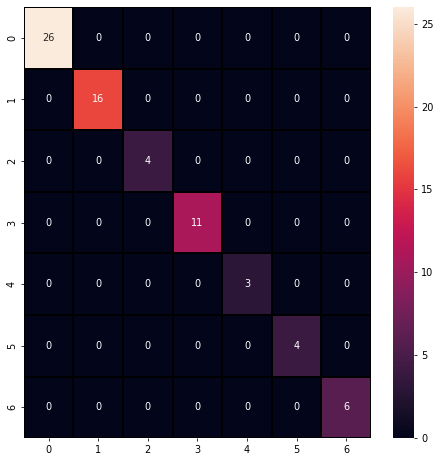

confusion matrix - test set, accuracy: 0.9354838709677419


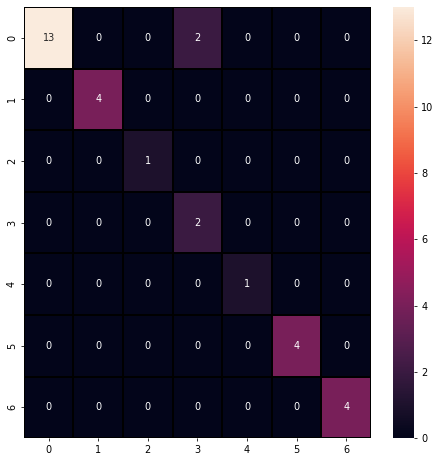


3-NN Classifier
confusion matrix - training set, accuracy: 0.9142857142857143


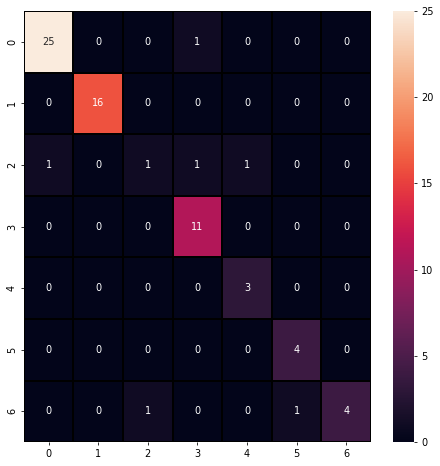

confusion matrix - test set, accuracy: 0.9032258064516129


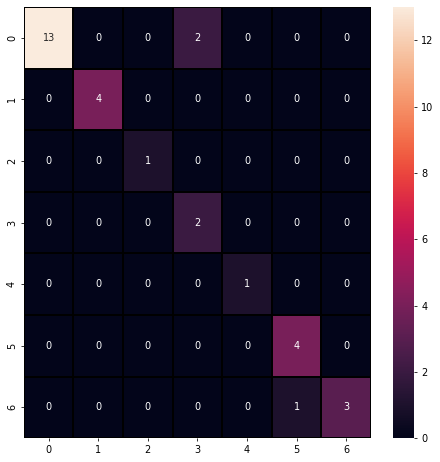


5-NN Classifier
confusion matrix - training set, accuracy: 0.9428571428571428


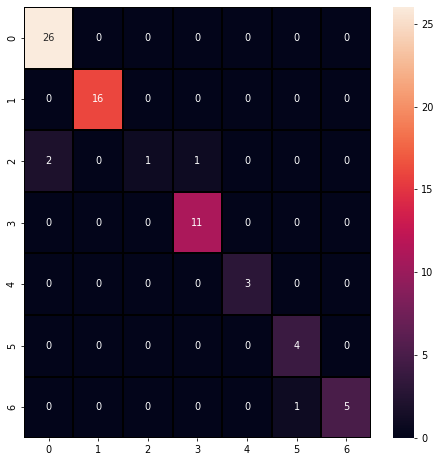

confusion matrix - test set, accuracy: 0.9032258064516129


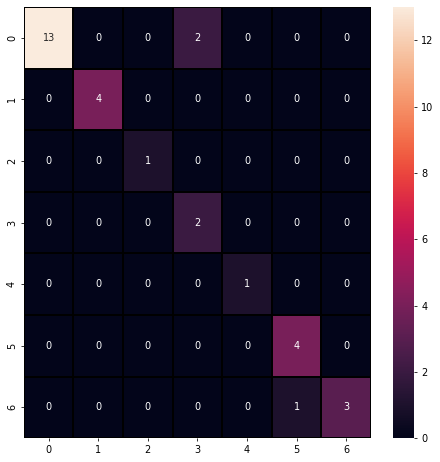


7-NN Classifier
confusion matrix - training set, accuracy: 0.9428571428571428


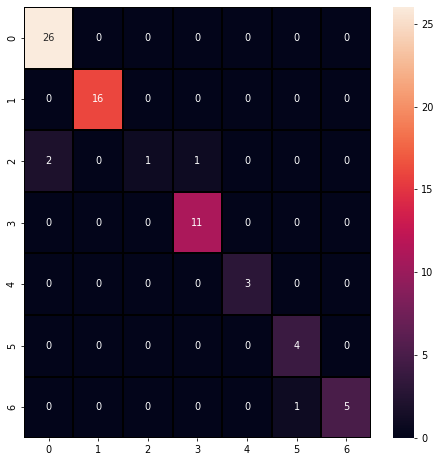

confusion matrix - test set, accuracy: 0.8709677419354839


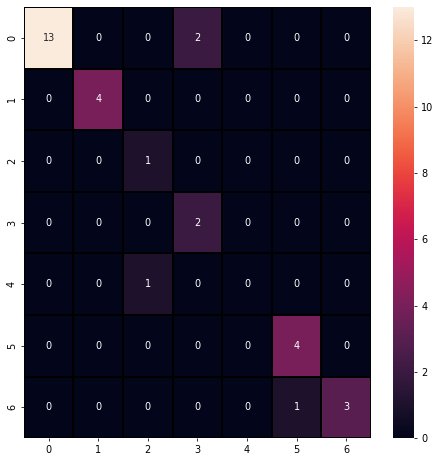


9-NN Classifier
confusion matrix - training set, accuracy: 0.8857142857142857


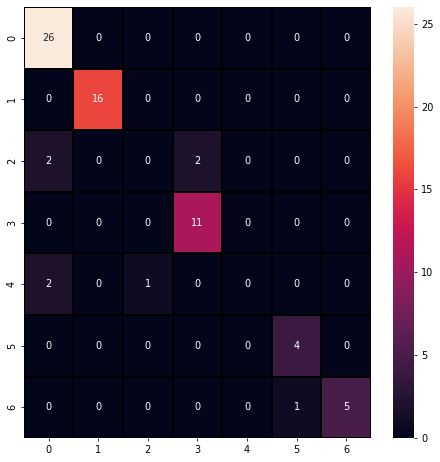

confusion matrix - test set, accuracy: 0.8387096774193549


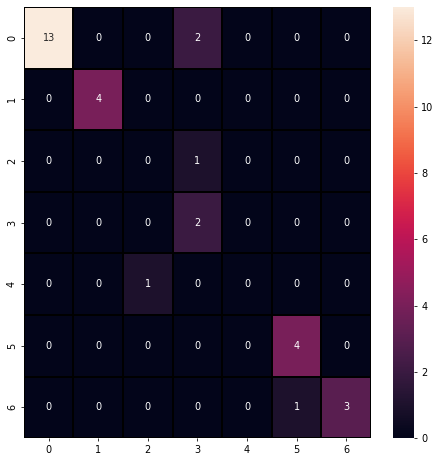

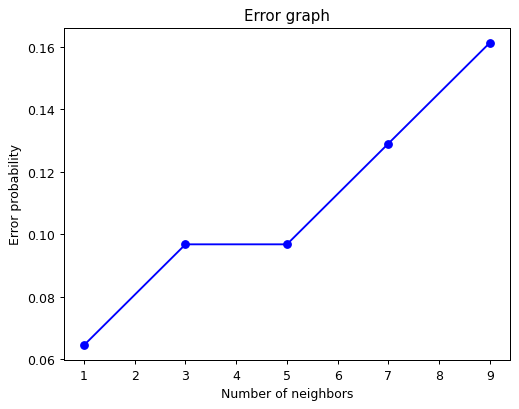

In [22]:
runKNN(data1)

We run the classifier for the second split.


1-NN Classifier
confusion matrix - training set, accuracy: 1.0


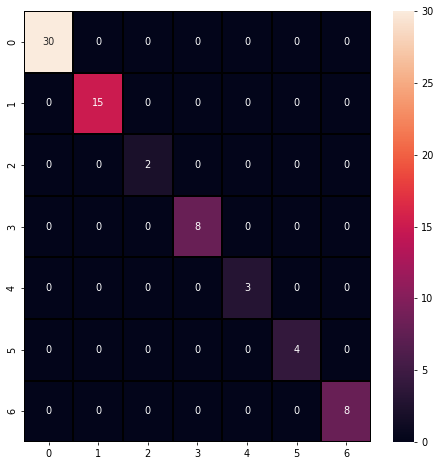

confusion matrix - test set, accuracy: 0.9354838709677419


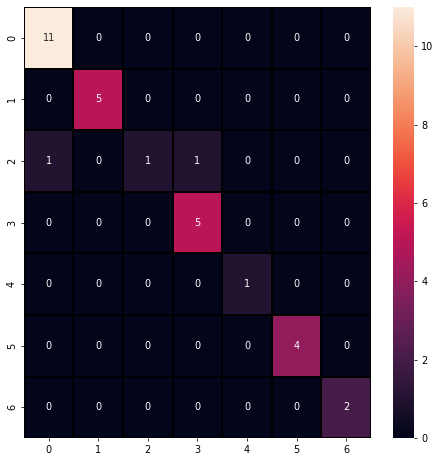


3-NN Classifier
confusion matrix - training set, accuracy: 0.9857142857142858


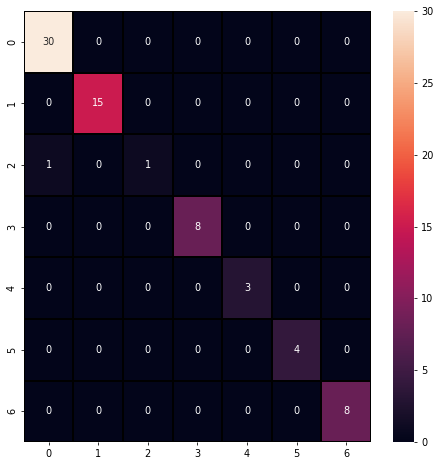

confusion matrix - test set, accuracy: 0.9354838709677419


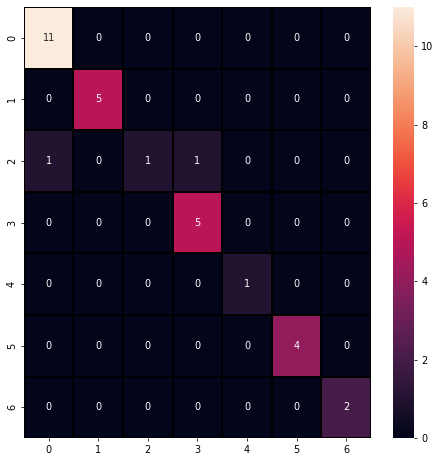


5-NN Classifier
confusion matrix - training set, accuracy: 0.9857142857142858


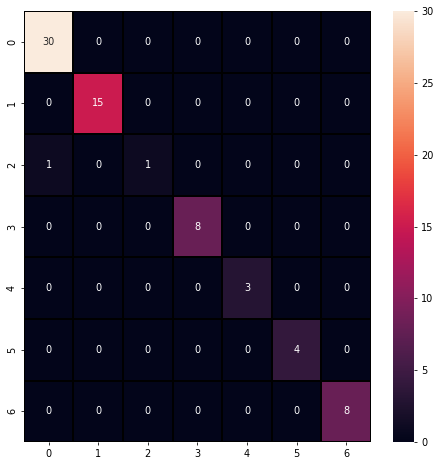

confusion matrix - test set, accuracy: 0.9354838709677419


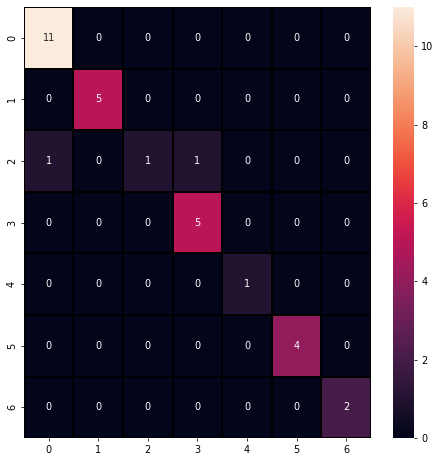


7-NN Classifier
confusion matrix - training set, accuracy: 0.9285714285714286


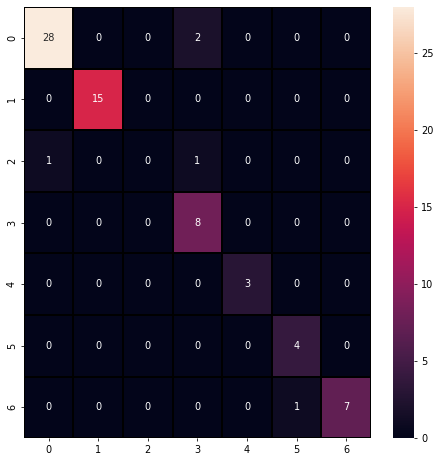

confusion matrix - test set, accuracy: 0.8709677419354839


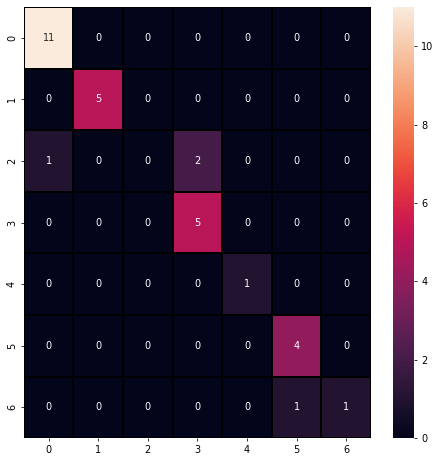


9-NN Classifier
confusion matrix - training set, accuracy: 0.8571428571428571


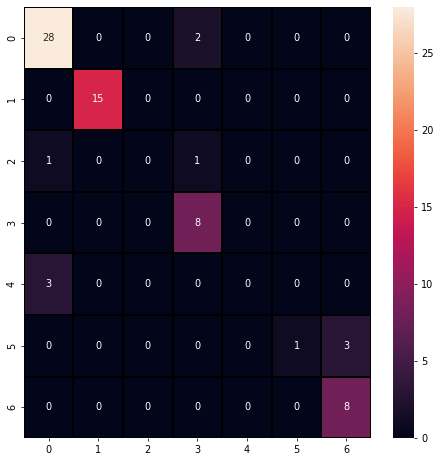

confusion matrix - test set, accuracy: 0.8387096774193549


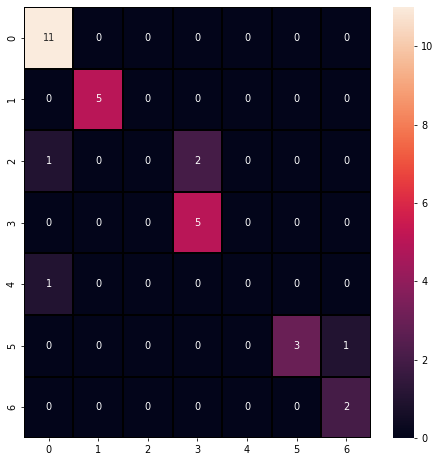

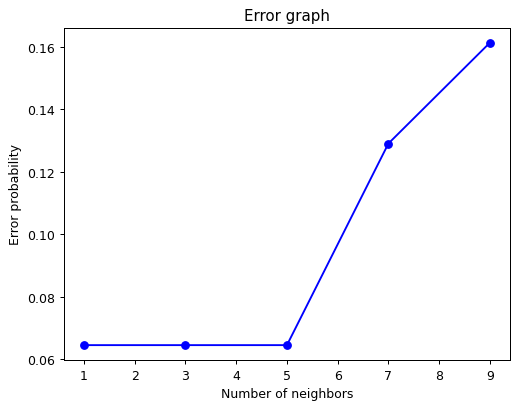

In [23]:
runKNN(data2)

We can observe that this classifier performs best with a single neighbor. As the number of neighbors increases, more errors start to appear. However, when this number is 1, the classification results are very good.

Next, we calculate the mean accuracy and its standard deviation for multiple splits. We will use the 1-NN model, as it provided the best results for the first two splits.

In [24]:
model = KNeighborsClassifier(n_neighbors=1)
testSplits(10, model)

For the training set, the mean accuracy for  10  splits is  1.0  and the standard deviation is  0.0
For the test set, the mean accuracy for  10  splits is  0.9516129032258064  and the standard deviation is  0.026007283059027605


### Nearest Prototype Classifier

**npClass**
- Defines the nearest prototype model and runs the previously declared **verify** method.

In [25]:
def npClass(data):
    model = NearestCentroid()
    model.fit(data["descr_train"], data["dec_train"])
    print("\nNP Classifier")
    verify(model,data)

We run the classifier for the first split.


NP Classifier
confusion matrix - training set, accuracy: 1.0


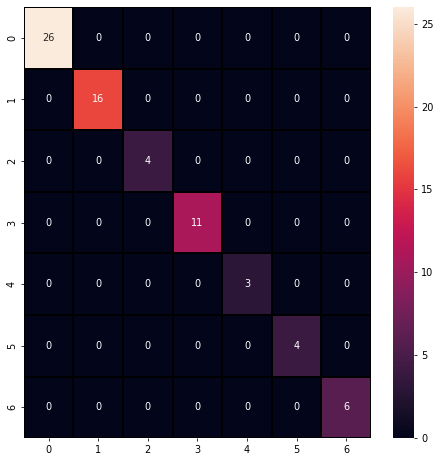

confusion matrix - test set, accuracy: 0.9354838709677419


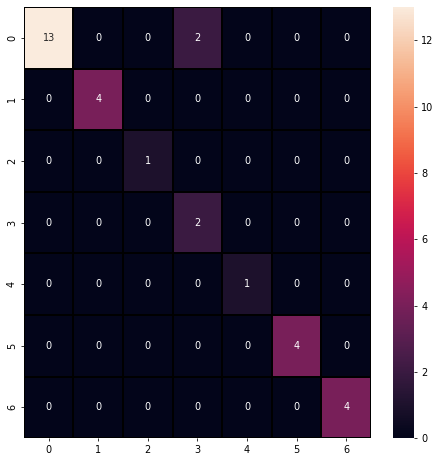

In [26]:
npClass(data1)

We run the classifier for the second split.


NP Classifier
confusion matrix - training set, accuracy: 0.9714285714285714


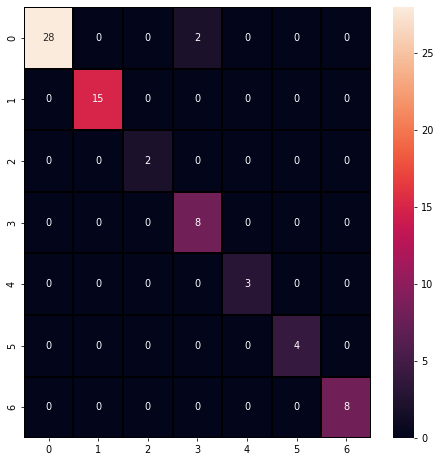

confusion matrix - test set, accuracy: 0.9354838709677419


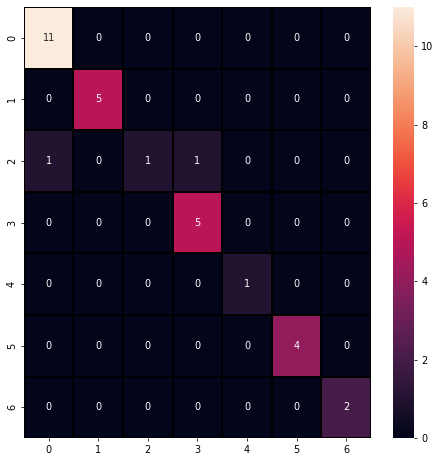

In [27]:
npClass(data2)

We display the mean and standard deviation as in the previous classifier.

In [28]:
model = NearestCentroid()
testSplits(10, model)

For the training set, the mean accuracy for  10  splits is  0.9757142857142856  and the standard deviation is  0.009147320339189802
For the test set, the mean accuracy for  10  splits is  0.9387096774193548  and the standard deviation is  0.0393759858572055


### Bayes Classifier

**bayesClass**
- Defines the Bayesian classifier model and runs the previously declared **verify** method.

In [29]:
def bayesClass(data):
    model = GaussianNB()
    model.fit(data["descr_train"], data["dec_train"])
    print("\nBayes Classifier")
    verify(model,data)

We run the classifier for the first split.


Bayes Classifier
confusion matrix - training set, accuracy: 1.0


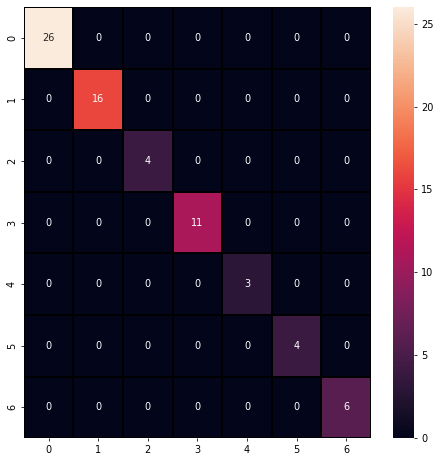

confusion matrix - test set, accuracy: 1.0


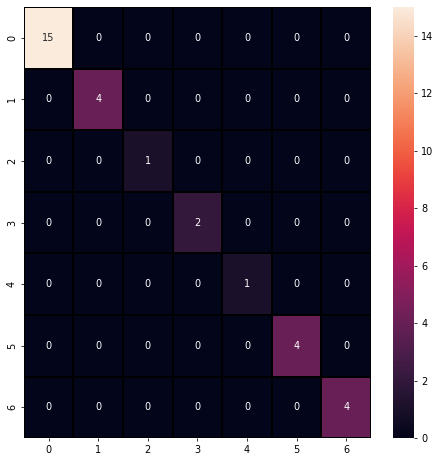

In [30]:
bayesClass(data1)

We run the classifier for the second split.


Bayes Classifier
confusion matrix - training set, accuracy: 1.0


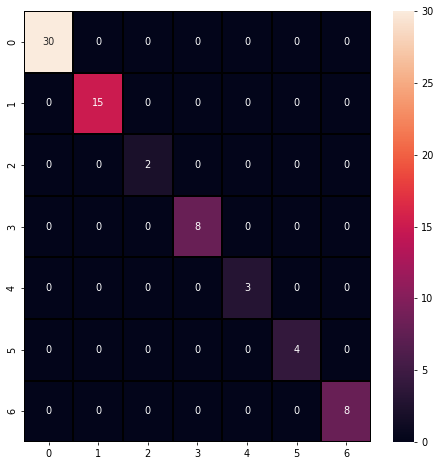

confusion matrix - test set, accuracy: 0.9354838709677419


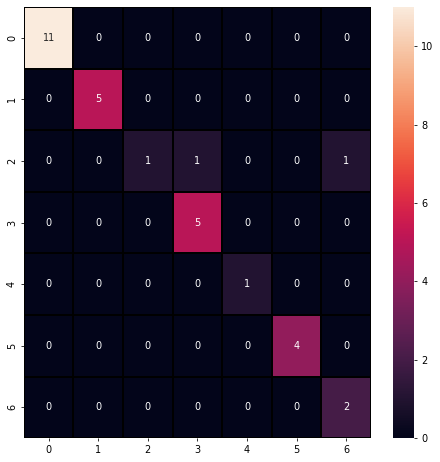

In [31]:
bayesClass(data2)

We display the mean accuracies and standard deviations.

In [32]:
model = GaussianNB()
testSplits(10, model)

For the training set, the mean accuracy for  10  splits is  1.0  and the standard deviation is  0.0
For the test set, the mean accuracy for  10  splits is  0.9516129032258064  and the standard deviation is  0.0297404659912674


### Decision Tree

**treeClass**
- Defines the decision tree model and runs the previously declared **verify** method.

**runTree**
- Executes the **treeClass** method for tree depths g = [1, 2, 3, 4, 5, 6, 7, 8]. Displays the error plot.

In [33]:
def treeClass(data, n):
    model = tree.DecisionTreeClassifier(max_depth=n)
    print("\nTree classifier with depth "+str(n))
    verify(model,data)

    return 1-model.score(data['descr_test'],data['dec_test'])
def runTree(data):
    sizes = [1,2,3,4,5,6,7,8]
    errors = np.zeros(len(sizes))
    for k in sizes:
        errors[k-1] = treeClass(data, k)
    plt.figure(dpi=90)
    plt.plot(sizes, errors,'bo-')
    plt.title('Error graph')
    plt.xlabel('Tree depth')
    plt.ylabel('Error probability')

We run the classifier for the first split.


Tree classifier with depth 1
confusion matrix - training set, accuracy: 0.6


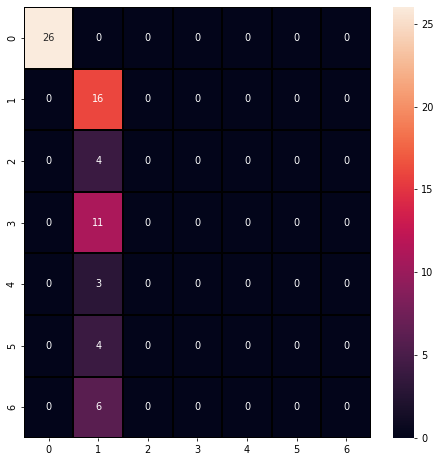

confusion matrix - test set, accuracy: 0.6129032258064516


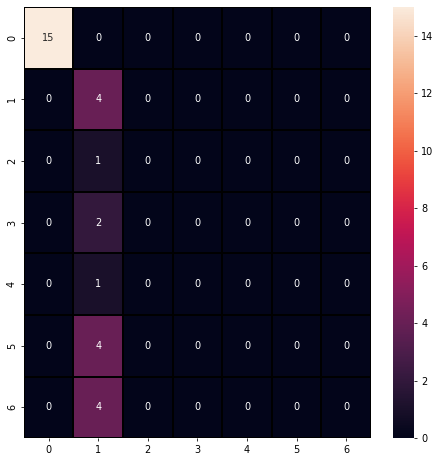


Tree classifier with depth 2
confusion matrix - training set, accuracy: 0.7571428571428571


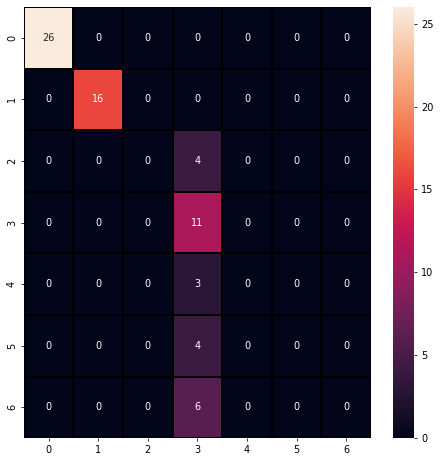

confusion matrix - test set, accuracy: 0.6774193548387096


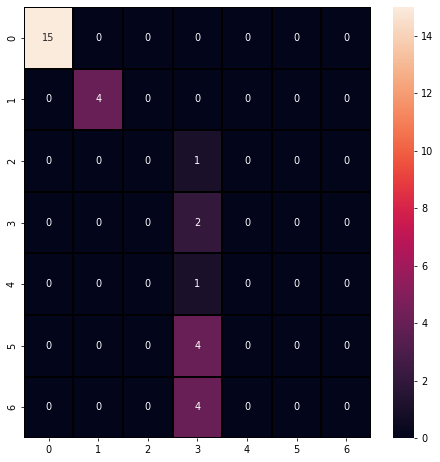


Tree classifier with depth 3
confusion matrix - training set, accuracy: 0.8428571428571429


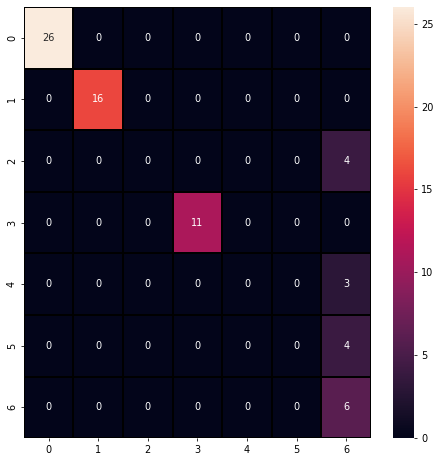

confusion matrix - test set, accuracy: 0.8064516129032258


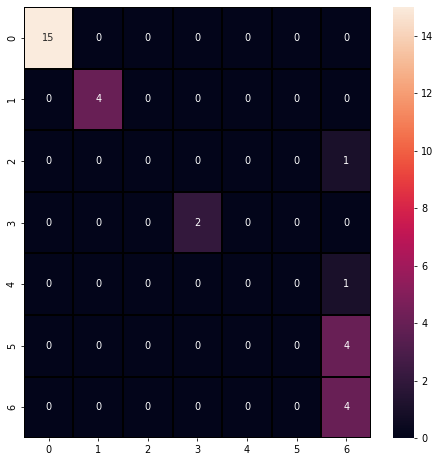


Tree classifier with depth 4
confusion matrix - training set, accuracy: 0.9


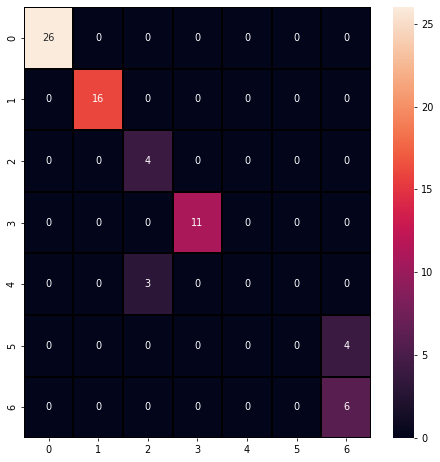

confusion matrix - test set, accuracy: 0.8387096774193549


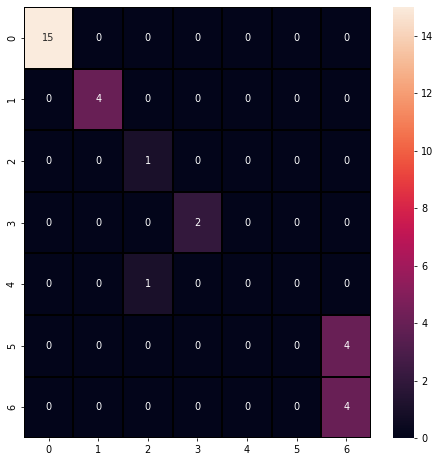


Tree classifier with depth 5
confusion matrix - training set, accuracy: 0.9714285714285714


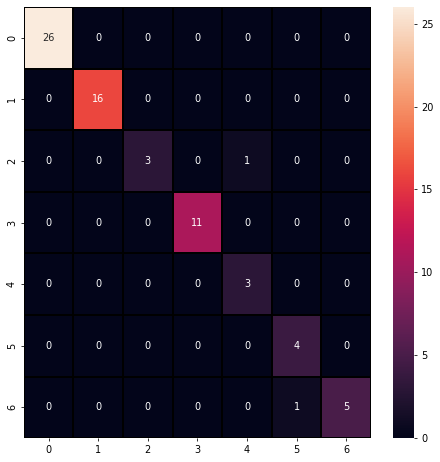

confusion matrix - test set, accuracy: 0.967741935483871


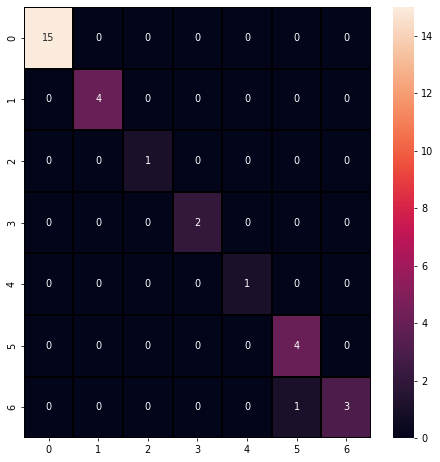


Tree classifier with depth 6
confusion matrix - training set, accuracy: 1.0


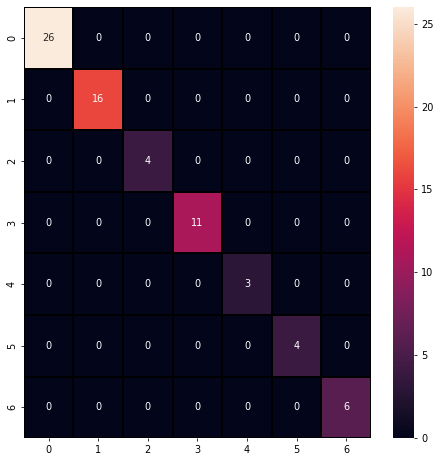

confusion matrix - test set, accuracy: 1.0


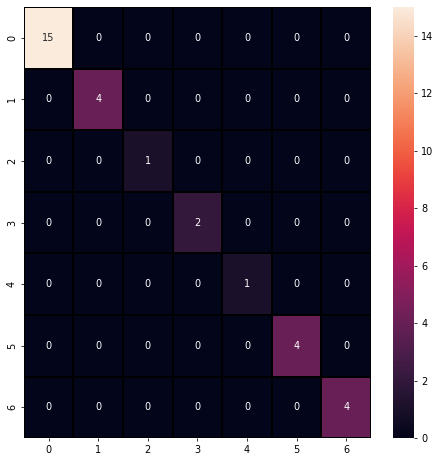


Tree classifier with depth 7
confusion matrix - training set, accuracy: 1.0


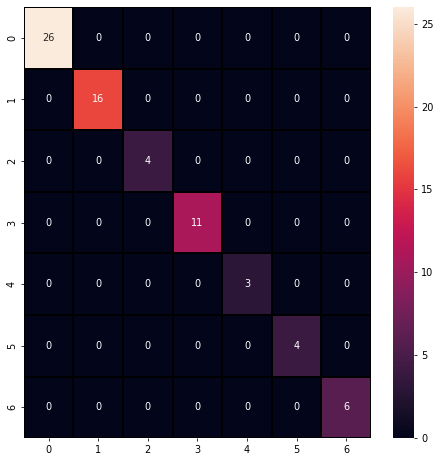

confusion matrix - test set, accuracy: 1.0


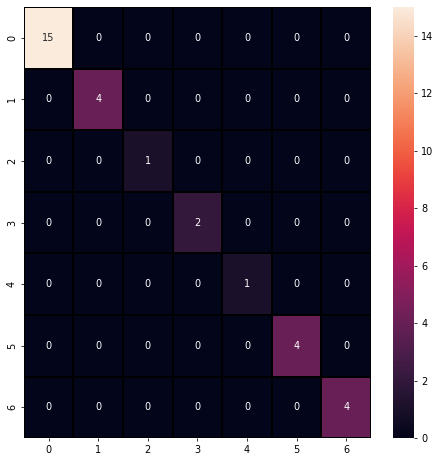


Tree classifier with depth 8
confusion matrix - training set, accuracy: 1.0


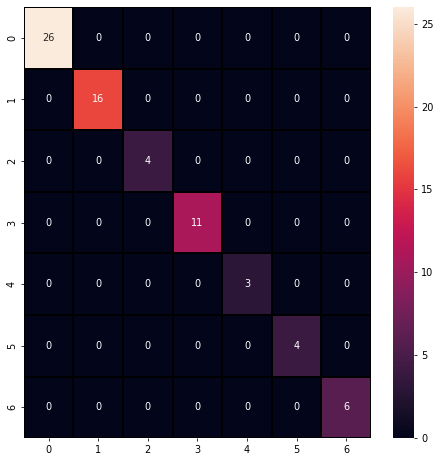

confusion matrix - test set, accuracy: 1.0


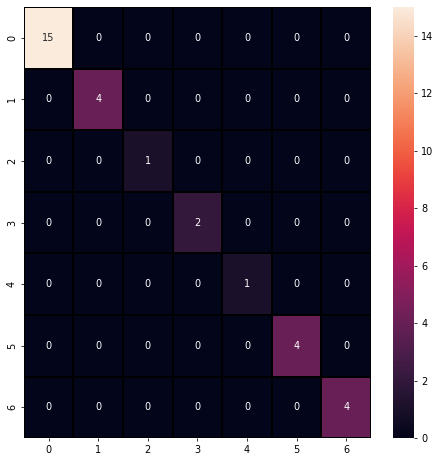

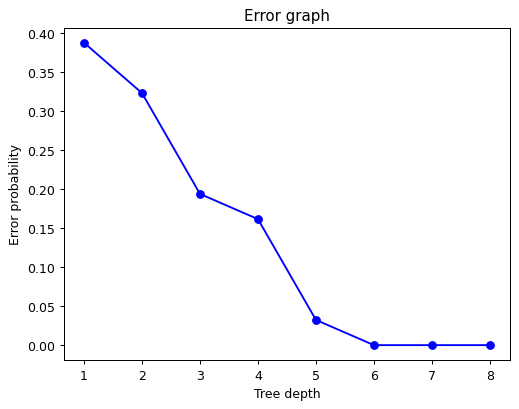

In [34]:
runTree(data1)

We run the classifier for the second split.


Tree classifier with depth 1
confusion matrix - training set, accuracy: 0.6428571428571429


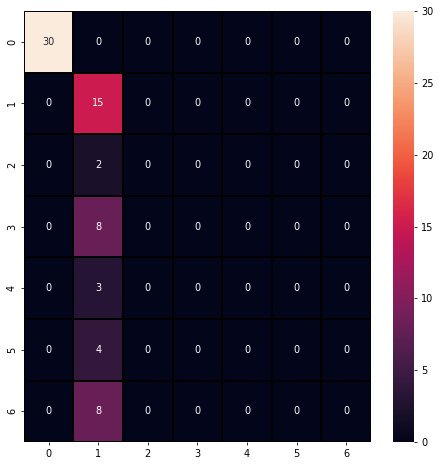

confusion matrix - test set, accuracy: 0.5161290322580645


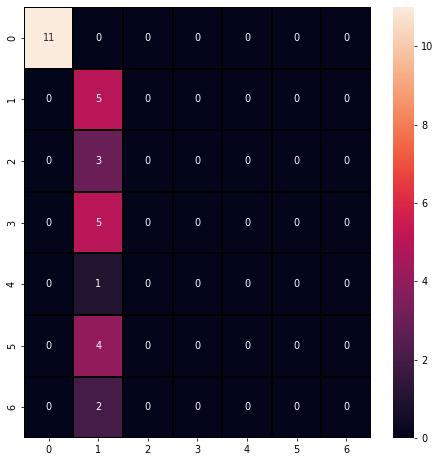


Tree classifier with depth 2
confusion matrix - training set, accuracy: 0.7571428571428571


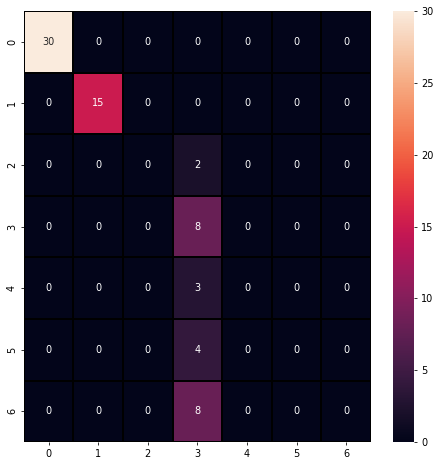

confusion matrix - test set, accuracy: 0.6774193548387096


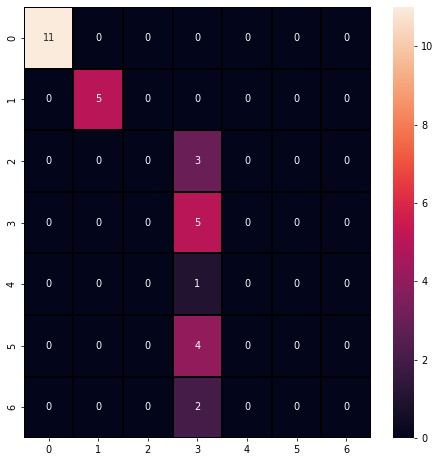


Tree classifier with depth 3
confusion matrix - training set, accuracy: 0.8714285714285714


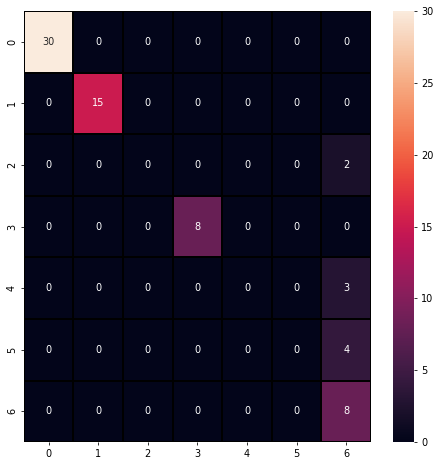

confusion matrix - test set, accuracy: 0.7419354838709677


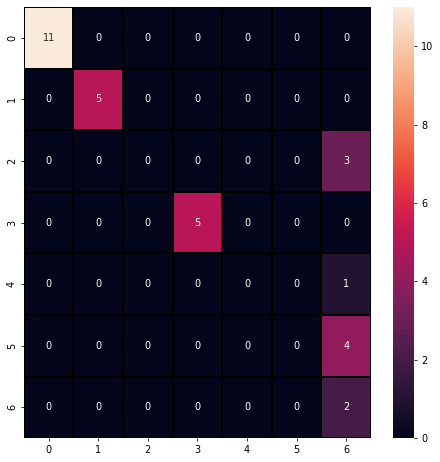


Tree classifier with depth 4
confusion matrix - training set, accuracy: 0.9142857142857143


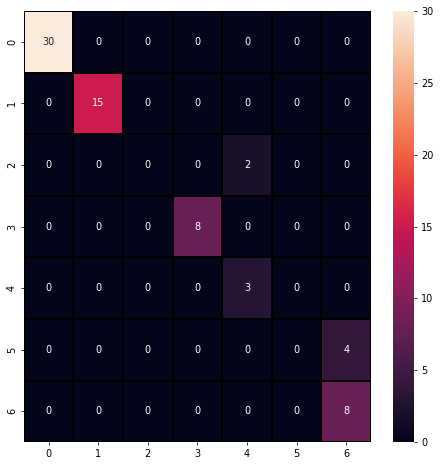

confusion matrix - test set, accuracy: 0.7741935483870968


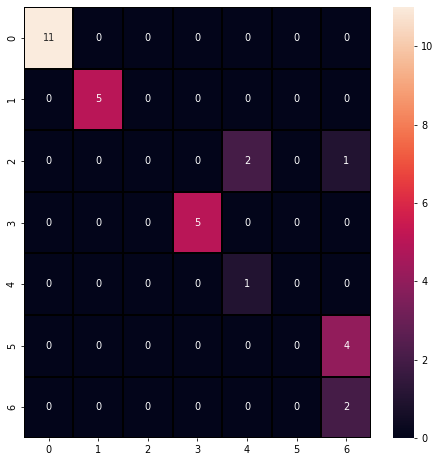


Tree classifier with depth 5
confusion matrix - training set, accuracy: 0.9857142857142858


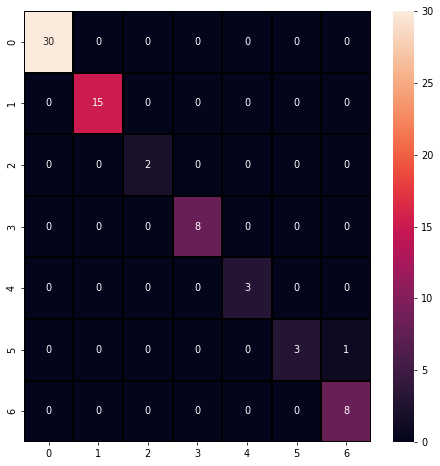

confusion matrix - test set, accuracy: 0.9032258064516129


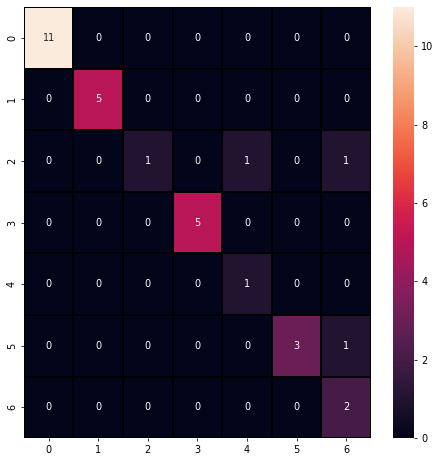


Tree classifier with depth 6
confusion matrix - training set, accuracy: 0.9857142857142858


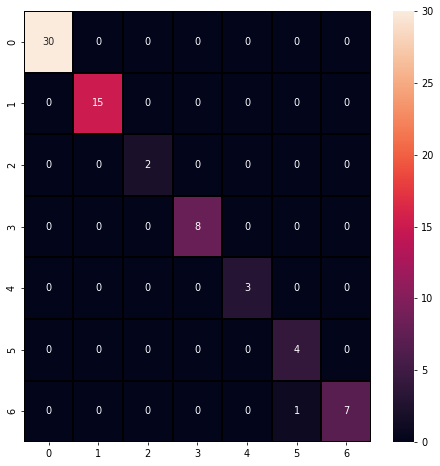

confusion matrix - test set, accuracy: 0.9354838709677419


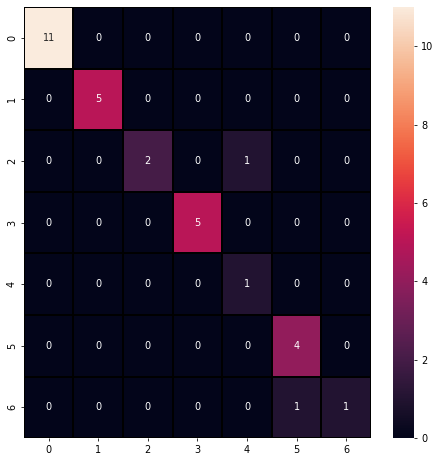


Tree classifier with depth 7
confusion matrix - training set, accuracy: 1.0


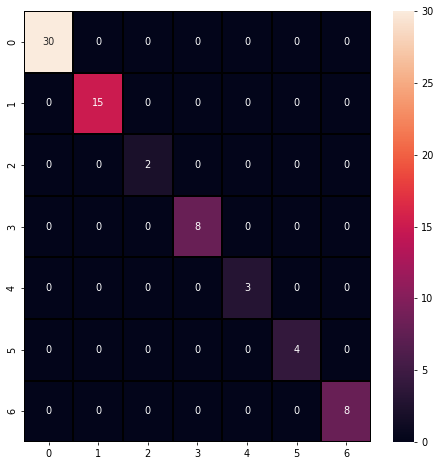

confusion matrix - test set, accuracy: 0.967741935483871


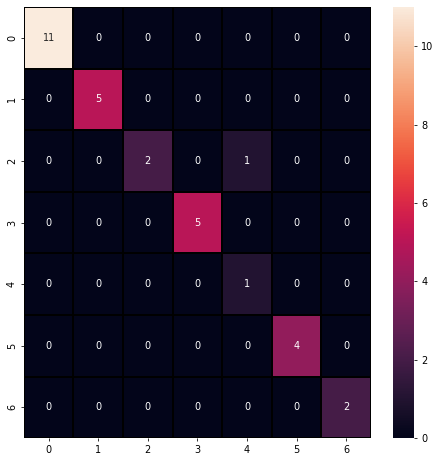


Tree classifier with depth 8
confusion matrix - training set, accuracy: 1.0


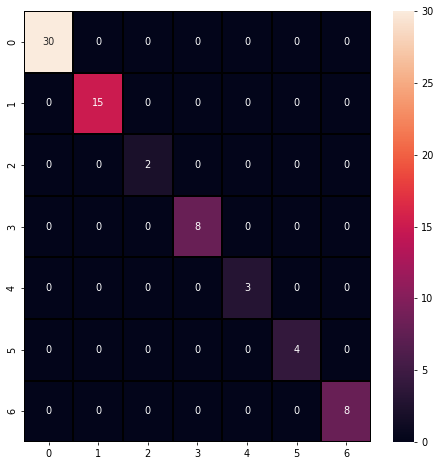

confusion matrix - test set, accuracy: 0.9354838709677419


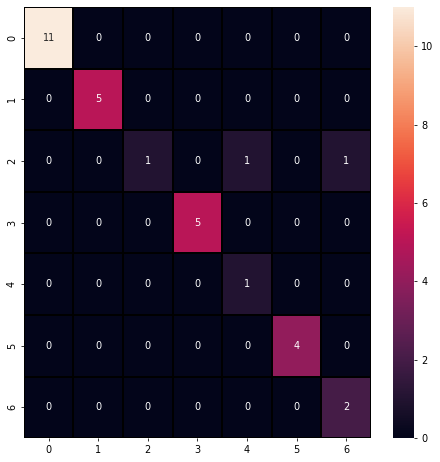

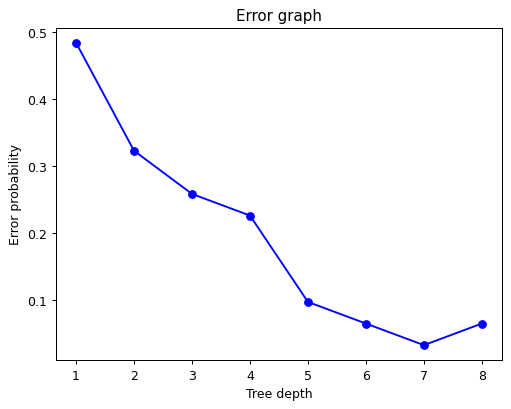

In [35]:
runTree(data2)

As we can see, this classifier starts performing very well on our dataset from a certain depth. For the first split, the error probability drops to a minimum at depth 6, and for the second split, it drops at depth 7.

We display the mean distances and standard deviations. We selected a tree with depth 7 as the model, as it provided the best results for the previous two splits.

In [36]:
model = tree.DecisionTreeClassifier(max_depth = 7)
testSplits(10, model)

For the training set, the mean accuracy for  10  splits is  1.0  and the standard deviation is  0.0
For the test set, the mean accuracy for  10  splits is  0.9290322580645161  and the standard deviation is  0.04516129032258065


## Conclusions

### a) Two splits with a fixed seed
**Based on accuracy:**
1. Data1
* The best accuracies for both sets were achieved by the Bayesian classifier (1.0, 1.0), decision tree with depth 7 (1.0, 1.0), and depth 8 (1.0, 1.0). Good results were also obtained by the tree with depth 6 (1.0, 0.967), 1NN (1.0, 0.935), and NP (1.0, 0.935).
2. Data2
* Best accuracies: Bayesian classifier (1.0, 0.935), decision tree with depth 7 (1.0, 0.935), depth 8 (1.0, 0.935), 1NN (1.0, 0.935), NP (0.971, 0.935), decision tree with depth 6 (0.985, 0.935).

Comparison:

The best classifier for this dataset turned out to be the Bayesian classifier and the decision tree with depth 7. Both classifiers achieved the highest accuracies for both analyzed splits (Data1, Data2). The 1NN and NP classifiers also achieved very high accuracies, and since the differences are very small, it can be concluded that they are also suitable for this dataset.

### b) 10 splits with different seeds
**Based on the mean accuracy and standard deviation:**

1. #### k-Nearest Neighbor Classifier with k = 1

The best results were achieved with k = 1, so it was chosen as the only model for analysis:
- For the training set, the mean accuracy is 1.0 and the standard deviation is 0.0
- For the test set, the mean accuracy is 0.945 and the standard deviation is 0.040

2. #### Nearest Prototype Classifier
- For the training set, the mean accuracy is 0.975 and the standard deviation is 0.014
- For the test set, the mean accuracy is 0.945 and the standard deviation is 0.038

3. #### Bayesian Classifier
- For the training set, the mean accuracy is 1.0 and the standard deviation is 0.0
- For the test set, the mean accuracy is 0.964 and the standard deviation is 0.030

4. #### Decision Tree with depth g = 7

The best results were achieved with depth g = 7, so it was chosen as the only model for analysis:
- For the training set, the mean accuracy is 1.0 and the standard deviation is 0.0
- For the test set, the mean accuracy is 0.970 and the standard deviation is 0.039

#### Comparison:

Analyzing the mean accuracy values, we can see that the best results for the test set were achieved by the decision tree with depth 7 and the Bayesian classifier. The 1-NN and Nearest Prototype classifiers had the same mean for the test set, but 1-NN had a better mean for the training set. The standard deviation values are small for each classifier for both sets.

### Summary:

Considering the conclusions from section a and section b, we can conclude that the best classifiers for this dataset are the decision tree with depth 7 and the Bayesian classifier. The other analyzed classifiers also performed well, and the differences between them are minor.